# 1.Machine Learning

## Ê≥¢Â£´È°øÊàø‰ª∑ÁöÑÁ∫øÊÄßËßÑÂàíÈóÆÈ¢ò

In [7]:
from sklearn.datasets import load_boston

In [8]:
type(load_boston())

sklearn.utils.Bunch

In [9]:
data = load_boston(True)

In [10]:
load_boston?

In [11]:
import numpy as np

In [12]:
data[0].shape

(506, 13)

In [13]:
x = data[0].T
y = data[1]

In [14]:
print(len(x),len(x[0]),len(y))

13 506 506


### ËßÇÂØüËæìÂÖ•‰∏éËæìÂá∫ÁöÑËßÑÂæã

In [15]:
from matplotlib import pyplot as plt

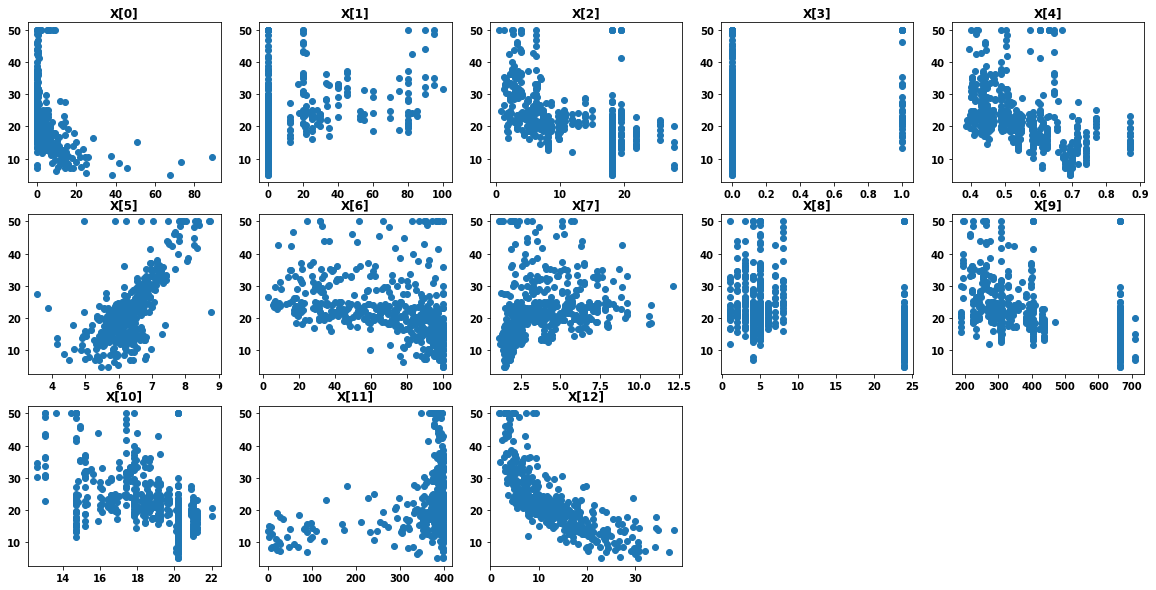

In [16]:
plt.figure(figsize=(20, 10))
for i in range(len(x)):
    plt.subplot(3,5,i+1)
    plt.scatter(x[i],y)
    plt.title('X[{}]'.format(i))

### ÈÄâÂèñÁ¨¨6È°πÂ±ûÊÄßTest

Text(0.5,0,'X')

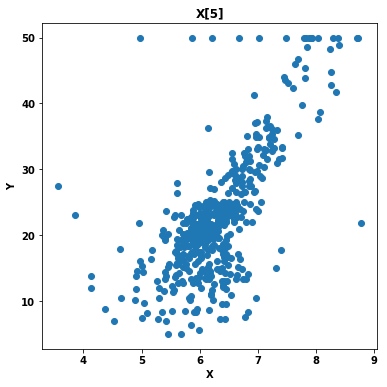

In [17]:
plt.figure(figsize=(6, 6))   
plt.scatter(x[5],y)
plt.title('X[5]')
plt.ylabel('Y')
plt.xlabel('X')

## ‰∏âÁßçÊñπÊ≥ïÊãüÂêày=kx+b

### 1.1 ÈöèÊú∫ÈÄâÊã©k‰∏ébÔºå‰ΩøÂæólossÂ∞ΩÂèØËÉΩÂ∞èÔºåloss =1/n*sum (y-y_)^2

In [18]:
import random
def rand_k_b(epoch,x,y):
    cost = 0
    k = 0
    b = 0
    for i in range(epoch):
        k0 = random.random()*1000 - 100
        b0 = random.random()*200 - 100
        y0 = k0*x + b0
        cost0 = np.sum((y-y0)**2)/len(x) 
        if i == 0:
            cost = cost0
            print('Epoch = {} Current Loss is {} and k = {},b = {}'.format(i,cost,k0,b0))
        else:
            if cost0 < cost:
                cost = cost0
                k = k0
                b = b0
                print('Epoch = {} Current Loss is {} and k = {},b = {}'.format(i,cost,k,b))   
    return k,b

In [19]:
X = x[5]

In [20]:
rand_k_b(1000,X,y)

Epoch = 0 Current Loss is 26520988.75522267 and k = 831.7355797905742,b = -87.24634796796478
Epoch = 1 Current Loss is 9474992.271862576 and k = 479.8133419080558,b = 67.43800013121313
Epoch = 2 Current Loss is 6965916.523035954 and k = 410.4932323323418,b = 66.94564544570656
Epoch = 5 Current Loss is 6494881.679699204 and k = 421.22083102139084,b = -92.65968804852803
Epoch = 6 Current Loss is 5772.734534326004 and k = 0.01759400473619621,b = -52.99972939716135
Epoch = 80 Current Loss is 1036.907959664168 and k = -2.202140634603353,b = 5.8708513906716036
Epoch = 129 Current Loss is 844.0751645337542 and k = 5.757418498023668,b = 14.544621681711618
Epoch = 151 Current Loss is 71.69409413933008 and k = 5.873044992740191,b = -9.58586284418513
Epoch = 478 Current Loss is 54.441386372712586 and k = 9.012254511296817,b = -37.39785641734903


(9.012254511296817, -37.39785641734903)

### 1.2 ÊúâÁõëÁù£ÊñπÂêë

In [21]:
def limit_direction(epoch,x,y):
    direction = [[1,1],
                 [1,-1],
                 [-1,1],
                 [-1,-1]]
    next_dir = random.choice(direction)
    learning_rate = 0.2
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    #cost_ = 0
    #cost0 = 0
    for i in range(epoch):
        k += next_dir[0]*learning_rate
        b += next_dir[1]*learning_rate        
        y_hat = k*x + b
        cost = np.sum((y-y_hat)**2)/len(y)
        if i == 0: cost_ = cost
        elif cost < cost_:       #if direction is right
            cost_ = cost       #refresh the loss
            print('\r Epoch = {} Current Loss is {} and k = {},b = {},next = {}'.format(i,cost,k,b,next_dir),end='')
        else:                                        #if direction not right 
            k -= next_dir[0]*learning_rate           #k,b reroll
            b -= next_dir[1]*learning_rate
            next_dir = random.choice([i for i in direction if i!= next_dir])    
            #next_dir = random.choice(direction)      #random choose a direction
            #print('Epoch = {} Current Loss is {} and k = {},b = {},next = {}--Bad desision'.format(i,cost,k,b,next_dir))            
        #print('Epoch = {} Current Loss is {} and k = {},b = {},next = {}'.format(i,cost,k,b,next_dir))
    plt.plot(x,k*x+b)
    plt.scatter(x,y)
    print('\n Bottom Loss is {} Best_k = {},Best_b = {}'.format(cost,k,b))
    return k,b

 Epoch = 227 Current Loss is 66.8316286437167 and k = 2.2405784836805998,b = 8.637842527466251,next = [-1, 1]
 Bottom Loss is 67.00988473446051 Best_k = 2.2405784836805998,Best_b = 8.637842527466251


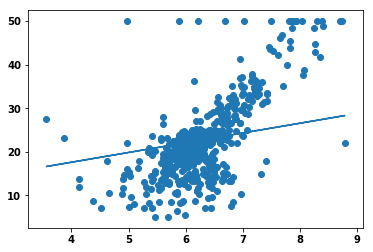

In [22]:
import matplotlib.pyplot as plt 
k , b = limit_direction(3000,X,y)

### 1.3 Ê¢ØÂ∫¶‰∏ãÈôç loss = MSE or RMS
$$ C = \frac{1}{n}\sum{(y-\hat{y})}^2 $$
$$ \Delta{C} \approx -\frac{2}{n}\sum{(y-\hat{y})(\frac{\partial{\hat{y}}}{\partial{k}}\Delta{k}+\frac{\partial{\hat{y}}}{\partial{b}}\Delta{b})} $$
$$ = -\frac{2}{n}\sum{(y-\hat{y})(x\Delta{k}+\Delta{b})}$$
$$ if \rightarrow x\Delta{k}+\Delta{b} = \eta(y-\hat{y}) = -\eta kx+\eta(y-b)$$
$$ \Delta{C} \approx  - \eta C$$
$$ assume: \Delta{b} = \eta(y-b) \rightarrow \Delta{k} = -\eta k $$
Update k and b: 
$$ k\rightarrow\hat{k} = k + \Delta{k} = k - \eta k $$
$$b\rightarrow\hat{b} = b + \Delta{b} = b + \eta(y-b)$$

In [23]:
def gd_k_b(epoch,eta,init,x,y,loss = 'MSE'):
    #eta = 0.1
    k = random.random()*init
    b = random.random()*init
    cost = 0
    for i in range(epoch):        
        k_partial = 0
        b_partial = 0
        y_hat = k*x+b
        if loss == 'MSE': 
            #cost_deta = -2*np.sum((y-y_hat)*(x*k_delta+b_delta))/len(x) 
            k_partial = -2*np.sum((y-y_hat)*x)/len(x)
            b_partial = -2*np.sum((y-y_hat))/len(x)
        elif loss == 'RMS':
            k_partial = np.sum([x[i] if((y-y_hat)[i]<0)  else -x[i] for i in range(len(x))])/len(x)
            b_partial = np.sum([1 if((y-y_hat)[i]<0)  else -1 for i in range(len(x))])/len(x)
        k = k - k_partial*eta               #update k and b
        b = b - b_partial*eta
        y_hat = k*x+b
        if loss == 'MSE': 
            cost = np.sum((y-y_hat)**2)/len(x) 
        elif loss == 'RMS':                                 
            cost = np.sum(abs(y-y_hat))/len(x)
        #print('Epoch = {} Current Loss is {} k_partial = {} b_partial = {} and k = {},b = {}'.format(i,cost,k_partial,b_partial,k,b))
    print(' Epoch = {} eta = {} Loss is {} k = {},b = {}'.format(epoch,eta,cost,k,b))        
    return k,b,cost

#### MSE

 Epoch = 7000 eta = 0.01 Loss is 44.14439484497682 k = 8.057666240767986,b = -28.02679725032244


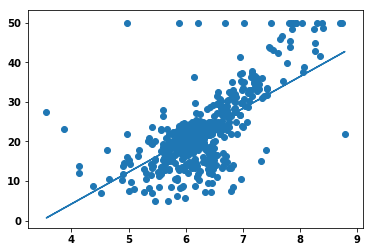

In [24]:
k,b,__= gd_k_b(7000,0.01,1,X,y,loss='MSE')
plt.plot(X,k*X+b)
plt.scatter(X,y)

#### etaÔºàÂ≠¶‰π†ÈÄüÁéáÔºâ‰∏éÊÄßËÉΩ

In [25]:
def dif_eta(epoch,x,y,loss = 'MSE'):
    etas = [i*0.0004 for i in range(1,50)]
    costs = []
    for i in range(len(etas)):
        __,__,cost = gd_k_b(epoch,etas[i],1,x,y,loss)
        print(cost)
        costs.append(cost)
    plt.plot(etas,costs)

 Epoch = 7000 eta = 0.0004 Loss is 56.901680027600875 k = 3.9368503124312744,b = -1.8138008340044935
56.901680027600875
 Epoch = 7000 eta = 0.0008 Loss is 55.3798482655611 k = 4.241311676238651,b = -3.7505154985712608
55.3798482655611
 Epoch = 7000 eta = 0.0012000000000000001 Loss is 54.198204404690834 k = 4.491559632945794,b = -5.342372282866625
54.198204404690834
 Epoch = 7000 eta = 0.0016 Loss is 52.865430151161064 k = 4.791211488768124,b = -7.248493099572014
52.865430151161064
 Epoch = 7000 eta = 0.002 Loss is 51.49733178401272 k = 5.1222026168939125,b = -9.353966725737207
51.49733178401272
 Epoch = 7000 eta = 0.0024000000000000002 Loss is 50.72232114993291 k = 5.322544250740647,b = -10.628363500888334
50.72232114993291
 Epoch = 7000 eta = 0.0028 Loss is 49.72687086377572 k = 5.596627788460547,b = -12.371841228835137
49.72687086377572
 Epoch = 7000 eta = 0.0032 Loss is 48.91823483381961 k = 5.836162532204982,b = -13.895550001211896
48.91823483381961
 Epoch = 7000 eta = 0.0036000000

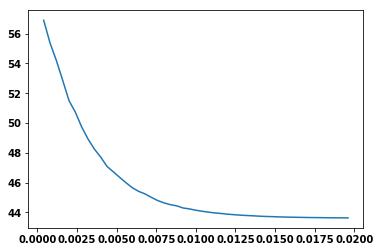

In [26]:
dif_eta(7000,X,y)

#### ÂàùÂßãÂåñÂå∫Èó¥‰∏éÊÄßËÉΩ

In [27]:
def dif_init(epoch,x,y,loss = 'MSE'):
    inits = [i*5 for i in range(1,51)]
    costs = []
    for i in range(len(inits)):
        __,__,cost = gd_k_b(epoch,0.001,inits[i],x,y,loss)
        print(cost)
        costs.append(cost)
    plt.plot(inits,costs)

 Epoch = 1000 eta = 0.001 Loss is 59.61949176949464 k = 3.4336537367924644,b = 1.3870919657007397
59.61949176949464
 Epoch = 1000 eta = 0.001 Loss is 61.61907807722706 k = 3.090268219275821,b = 3.5714077654390675
61.61907807722706
 Epoch = 1000 eta = 0.001 Loss is 61.615027581848324 k = 3.0909439765897933,b = 3.567109193418984
61.615027581848324
 Epoch = 1000 eta = 0.001 Loss is 70.29203124949451 k = 1.7850903965104234,b = 11.87379791966668
70.29203124949451
 Epoch = 1000 eta = 0.001 Loss is 68.48419589499207 k = 2.03722839733885,b = 10.26991834167232
68.48419589499207
 Epoch = 1000 eta = 0.001 Loss is 69.53687039104263 k = 1.8893403540332412,b = 11.210651637359934
69.53687039104263
 Epoch = 1000 eta = 0.001 Loss is 67.43384914815742 k = 2.187941414150822,b = 9.311215056136518
67.43384914815742
 Epoch = 1000 eta = 0.001 Loss is 74.12525295936513 k = 1.277303587075967,b = 15.103889738238033
74.12525295936513
 Epoch = 1000 eta = 0.001 Loss is 77.77246600428342 k = 0.8230211779546478,b = 

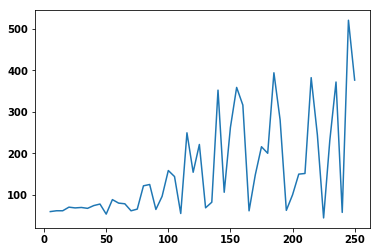

In [28]:
dif_init(1000,X,y)

#### RMS

 Epoch = 3000 eta = 0.1 Loss is 4.995442870566102 k = 5.227796996001742,b = -10.514838157931015


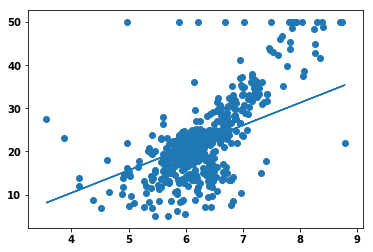

In [29]:
k,b,__= gd_k_b(3000,0.1,1,X,y,loss='RMS')
plt.plot(X,k*X+b)
plt.scatter(X,y)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: ÂΩìËæìÂÖ•Êï∞ÊçÆ‰∏éËæìÂá∫ÊòØÈ´òÁª¥Áõ∏ÂÖ≥Êó∂ÔºåÂá≠ÁªèÈ™åÂíåËßÇÂØüÊó†Ê≥ïÊâæÂà∞ÊãüÂêàÂÖ≥Á≥ªÔºåËøôÊó∂Â∞±ÈúÄË¶ÅÊú∫Âô®Â≠¶‰π†Êù•ÂàÜÊûêÊï∞ÊçÆÁîüÊàêÁÆóÊ≥ïÊ®°Âûã

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: ËØ•ÊñπÊ≥ïÊØèÊ¨°ÂùáÈöèÊú∫ÁîüÊàêk‰∏ébÔºåÂ¶ÇÊûúËø≠‰ª£Ê¨°Êï∞ËøáÂ∞ëÔºåÂàôÊó†Ê≥ïÊî∂ÊïõÂà∞ÂÖ®Â±ÄÊúÄ‰ºò„ÄÇ

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: ËØ•ÊñπÊ≥ïÁï•‰ºò‰∫éÁ¨¨‰∏ÄÁßçÔºå‰ΩÜÊòØ‰ªçÊúâÂæàÂ§öÊ¨°Êó†ÊïàËø≠‰ª£Âú®ËÆ°ÁÆólossÔºå‰πüÈúÄË¶ÅËæÉÂ§öÁöÑËø≠‰ª£Ê¨°Êï∞ÊâçËÉΩÊâæÂà∞ÂÖ®Â±ÄÊúÄ‰ºòÔºå‰∏îÊÄßËÉΩ‰∏çÁ®≥ÂÆö„ÄÇ

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:Êàë‰ª¨ÁöÑÁõÆÊ†áÊòØ‰ΩøÁõÆÊ†áÂáΩÊï∞Âú®Êï∞ÊçÆÈõÜ‰∏äÁöÑlossÂ∞ΩÂèØËÉΩË∂ãËøë‰∫é0ÔºåËÄålossÁöÑÂæÆÂàÜ(Ê¢ØÂ∫¶)ÊòæÁ§∫‰∫ÜlossÂèòÂåñÈáèÔºåÂ¶ÇÊûúÂú®ÊØèÊ¨°Ëø≠‰ª£‰∏≠ÈÉΩËÉΩ‰ΩøÂæÆÂàÜ(Ê¢ØÂ∫¶)<0ÔºåÁªèËøáÂ§öÊ¨°Ëø≠‰ª£Âç≥ÂèØÂÆûÁé∞ËØ•ÁõÆÊ†á

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:Ê¢ØÂ∫¶ÔºöÊòØÊåálossÂáΩÊï∞ÊØèÊ¨°Ëø≠‰ª£ÁöÑÂèòÂåñÈáè  ‰∏ãÈôçÔºöÊòØÊåálossÁöÑÊ¢ØÂ∫¶‰∏∫Ë¥üÂÄº

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:ÊØèÊ¨°Ëø≠‰ª£ÁöÑÈÉΩËÉΩ‰ΩølossÁöÑÊ¢ØÂ∫¶‰∏∫Ë¥üÂÄºÔºå‰ªéËÄå‰ΩølossÂáèÂ∞ëÔºåÂõ†ËÄåÂèØ‰ª•ÂæàÂø´Âú∞ËææÂà∞ÂÖ®Â±ÄÊúÄ‰ºòÁÇπ„ÄÇ

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:Êú∫Âô®Â≠¶‰π†Â∞±ÊòØÁªôÂÆöËæìÂÖ•Êï∞ÊçÆ‰∏éËæìÂá∫ÔºåÊãüÂêàËæìÂÖ•‰∏éËæìÂá∫ÔºåÁîüÊàêÁõÆÊ†áÂáΩÊï∞Ê®°ÂûãÔºàÁÆóÊ≥ïÔºâ„ÄÇ

# 2. Âú∞ÈìÅË∑ØÂæÑÊêúÁ¥¢

In [30]:
import matplotlib
print(matplotlib.__path__)

['e:\\anaconda2\\envs\\tf\\lib\\site-packages\\matplotlib']


In [31]:
import math

### Áà¨ÂèñÈ´òÂæ∑Âú∞ÈìÅÊï∞ÊçÆ

In [32]:
import json
import requests
from lxml import etree

In [33]:
def get_citys():
    headers = {"User-Agent": "Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Mobile Safari/537.36"}
    start_url = 'http://map.amap.com/subway/index.html'
    txt = requests.get(start_url, headers).content
    html = etree.HTML(txt)
    areas = html.xpath("//a[contains(@class, 'city')]")
    citys = {}
    for area in areas:
        citys[area.text] = (area.get('id'), area.get('cityname'))
        #print(area.text,area.get('id'),area.get('cityname'))
    return citys    

In [34]:
citys = get_citys()
print(citys)

{'Âåó‰∫¨': ('1100', 'beijing'), '‰∏äÊµ∑': ('3100', 'shanghai'), 'ÂπøÂ∑û': ('4401', 'guangzhou'), 'Ê∑±Âú≥': ('4403', 'shenzhen'), 'Ê≠¶Ê±â': ('4201', 'wuhan'), 'Â§©Ê¥•': ('1200', 'tianjin'), 'Âçó‰∫¨': ('3201', 'nanjing'), 'È¶ôÊ∏Ø': ('8100', 'xianggang'), 'ÈáçÂ∫Ü': ('5000', 'chongqing'), 'Êù≠Â∑û': ('3301', 'hangzhou'), 'Ê≤àÈò≥': ('2101', 'shenyang'), 'Â§ßËøû': ('2102', 'dalian'), 'ÊàêÈÉΩ': ('5101', 'chengdu'), 'ÈïøÊò•': ('2201', 'changchun'), 'ËãèÂ∑û': ('3205', 'suzhou'), '‰ΩõÂ±±': ('4406', 'foshan'), 'ÊòÜÊòé': ('5301', 'kunming'), 'Ë•øÂÆâ': ('6101', 'xian'), 'ÈÉëÂ∑û': ('4101', 'zhengzhou'), 'ÈïøÊ≤ô': ('4301', 'changsha'), 'ÂÆÅÊ≥¢': ('3302', 'ningbo'), 'Êó†Èî°': ('3202', 'wuxi'), 'ÈùíÂ≤õ': ('3702', 'qingdao'), 'ÂçóÊòå': ('3601', 'nanchang'), 'Á¶èÂ∑û': ('3501', 'fuzhou'), '‰∏úËéû': ('4419', 'dongguan'), 'ÂçóÂÆÅ': ('4501', 'nanning'), 'ÂêàËÇ•': ('3401', 'hefei'), 'Ë¥µÈò≥': ('5201', 'guiyang'), 'Âé¶Èó®': ('3502', 'xiamen'), 'ÂìàÂ∞îÊª®': ('2301', 'haerbin'), 'Áü≥ÂÆ∂Â∫Ñ': ('1301', 'shijiazhuan

In [35]:
def get_metro(citys,city):
        if citys:
            id_name = citys.get(city)
            return {city : get_metrolist(id_name)}
        else:
            result_dict = {}
            for city_name, id_name in citys.items():
                result_dict[city_name] = get_metrolist(id_name)

            return result_dict

In [36]:
def get_metrolist(id_name):
    headers = {"User-Agent": "Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Mobile Safari/537.36"}
    prefix_url = 'http://map.amap.com/service/subway?srhdata={}_drw_{}.json'
    if id_name == None:
        return
    else:
        id, name = id_name
        url = prefix_url.format(id, name)
        line_dict = {}
        line_nums = {}
        json_dict = json.loads(requests.get(url, headers).text)
        #print(json_dict)    
        metro_lines = json_dict.get("l")    
        for line in metro_lines:
            line_name = line['ln']         #Á∫øË∑ØÂêç
            line_num = line['ls']          #Á∫øË∑ØÁ†Å
            line_nums[line_num] = line_name
        for line in metro_lines:
            station_attr = []
            line_list = []
            line_name = line['ln']         #Á∫øË∑ØÂêç
            conx = line['c']               #Á∫øË∑ØÂõæ
            station_conx = {}
            if line['st'][0]['p'] != conx[0]:   #Á´ôÁÇπ‰∏éÂõæÈÄÜÂ∫è
                conx.reverse()                   #ÂèçËΩ¨Âõæ
            conx = [[int(j) for j in i.split(' ')] for i in line['c']]
            for station in line['st']:
                trx = [line_nums[r] for r in station['r'].split('|')]
                rs = [int(i) for i in station['rs'].split('|')[0].split(' ')]
                cord = [float(c) for c in station['sl'].split(",")]
                station_attr.append([station['n'],rs,trx,cord])
            line_dict[line_name] = station_attr
        return line_dict    

### Ëé∑ÂèñÂπøÂ∑ûÂú∞ÈìÅÊï∞ÊçÆ

In [37]:
line_dict = get_metro(citys,'ÂπøÂ∑û')['ÂπøÂ∑û']
print(line_dict)

{'1Âè∑Á∫ø': [['Ë•øÂ°±', [435, 975], ['1Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'], [113.231978, 23.065437]], ['ÂùëÂè£', [435, 939], ['1Âè∑Á∫ø'], [113.232498, 23.078878]], ['Ëä±Âú∞Êπæ', [434, 905], ['1Âè∑Á∫ø'], [113.23403, 23.087055]], ['Ëä≥Êùë', [434, 874], ['1Âè∑Á∫ø'], [113.235703, 23.098592]], ['ÈªÑÊ≤ô', [434, 843], ['1Âè∑Á∫ø', '6Âè∑Á∫ø'], [113.239856, 23.110524]], ['ÈïøÂØøË∑Ø', [434, 809], ['1Âè∑Á∫ø'], [113.242271, 23.118402]], ['ÈôàÂÆ∂Á•†', [506, 772], ['1Âè∑Á∫ø'], [113.246439, 23.125727]], ['Ë•øÈó®Âè£', [593, 773], ['1Âè∑Á∫ø'], [113.25583, 23.125219]], ['ÂÖ¨Âõ≠Ââç', [680, 773], ['1Âè∑Á∫ø', '2Âè∑Á∫ø'], [113.264315, 23.125446]], ['ÂÜúËÆ≤ÊâÄ', [740, 773], ['1Âè∑Á∫ø'], [113.275602, 23.126623]], ['ÁÉàÂ£´ÈôµÂõ≠', [803, 773], ['1Âè∑Á∫ø'], [113.285663, 23.126704]], ['‰∏úÂ±±Âè£', [861, 773], ['1Âè∑Á∫ø', '6Âè∑Á∫ø'], [113.295373, 23.12398]], ['Êù®ÁÆï', [937, 774], ['1Âè∑Á∫ø', '5Âè∑Á∫ø'], [113.308877, 23.128137]], ['‰ΩìËÇ≤Ë•øË∑Ø', [1001, 774], ['1Âè∑Á∫ø', '3Âè∑Á∫ø', '3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.321503, 23.131138]]

In [38]:
line_dict['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)']

[['Êú∫Âú∫Âåó(2Âè∑Ëà™Á´ôÊ•º)', [905, 170], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.305659, 23.396197]],
 ['Êú∫Âú∫Âçó(1Âè∑Ëà™Á´ôÊ•º)', [905, 205], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.303048, 23.386627]],
 ['È´òÂ¢û', [905, 269], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)', '9Âè∑Á∫ø'], [113.295504, 23.355162]],
 ['‰∫∫Âíå', [905, 319], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.295995, 23.335224]],
 ['ÈæôÂΩí', [905, 369], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.300834, 23.288736]],
 ['ÂòâÁ¶æÊúõÂ≤ó', [905, 416], ['2Âè∑Á∫ø', '3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)', '14Âè∑Á∫ø'], [113.289243, 23.23746]],
 ['ÁôΩ‰∫ëÂ§ßÈÅìÂåó', [920, 452], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.298178, 23.222382]],
 ['Ê∞∏Ê≥∞', [949, 475], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.306295, 23.220226]],
 ['ÂêåÂíå', [978, 497], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.326264, 23.19706]],
 ['‰∫¨Ê∫™ÂçóÊñπÂåªÈô¢', [1001, 532], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.326126, 23.185225]],
 ['Ê¢ÖËä±Âõ≠', [1001, 568], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'], [113.320507, 23.175211]],
 ['ÁáïÂ°ò', [1001, 606], ['3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)', '6Âè∑Á∫ø'], [113.327132, 23.15998]],
 

In [39]:
from collections import defaultdict

In [40]:
conx1_rs = defaultdict(list)
conx1_rs = {}
conx1_pos = {}
connx1 = [i[0] for i in line_dict['1Âè∑Á∫ø']]
rs1 = [i[1] for i in line_dict['1Âè∑Á∫ø']]
conx1_rs['1Âè∑Á∫ø'] = connx1
for ln,rs in zip(connx1,rs1):
    conx1_pos[ln] = rs
print(conx1_rs)
print(conx1_pos)

{'1Âè∑Á∫ø': ['Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô', 'ÈïøÂØøË∑Ø', 'ÈôàÂÆ∂Á•†', 'Ë•øÈó®Âè£', 'ÂÖ¨Âõ≠Ââç', 'ÂÜúËÆ≤ÊâÄ', 'ÁÉàÂ£´ÈôµÂõ≠', '‰∏úÂ±±Âè£', 'Êù®ÁÆï', '‰ΩìËÇ≤Ë•øË∑Ø', '‰ΩìËÇ≤‰∏≠ÂøÉ', 'ÂπøÂ∑û‰∏úÁ´ô']}
{'Ë•øÂ°±': [435, 975], 'ÂùëÂè£': [435, 939], 'Ëä±Âú∞Êπæ': [434, 905], 'Ëä≥Êùë': [434, 874], 'ÈªÑÊ≤ô': [434, 843], 'ÈïøÂØøË∑Ø': [434, 809], 'ÈôàÂÆ∂Á•†': [506, 772], 'Ë•øÈó®Âè£': [593, 773], 'ÂÖ¨Âõ≠Ââç': [680, 773], 'ÂÜúËÆ≤ÊâÄ': [740, 773], 'ÁÉàÂ£´ÈôµÂõ≠': [803, 773], '‰∏úÂ±±Âè£': [861, 773], 'Êù®ÁÆï': [937, 774], '‰ΩìËÇ≤Ë•øË∑Ø': [1001, 774], '‰ΩìËÇ≤‰∏≠ÂøÉ': [1091, 713], 'ÂπøÂ∑û‰∏úÁ´ô': [1001, 662]}


In [41]:
import networkx as nx
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'

In [42]:
conx1_graph = nx.Graph()

In [43]:
nx.draw?

In [44]:
nx.Graph?

In [45]:
conx1_graph.add_nodes_from(connx1)

In [46]:
conx1_graph.add_path(connx1)

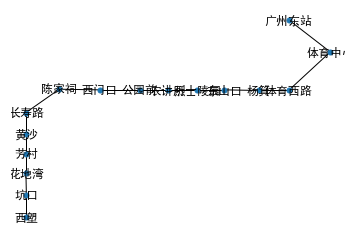

In [47]:
nx.draw(conx1_graph,conx1_pos,ax = plt.gca().invert_yaxis(),with_labels=True, node_size=25)

In [64]:
def gen_graph(line_dict):
    path_graph = {}
    laos = {}
    cords = {}
    trxs = {}
    for lx,ls in line_dict.items():
        for st in ls:                    #Á´ôÁÇπÂ±ûÊÄß
            path = []            
            for l in st[2]:              #Á∫øË∑Ø
                for s in line_dict[l]:                    
                    
                    if s[0] == st[0]:    #
                        
                        idx = line_dict[l].index(s)                        
                        if idx == 0:
                            path.append(line_dict[l][idx+1][0])
                        elif idx == len(line_dict[l])-1:
                            path.append(line_dict[l][idx-1][0])
                        else:
                            path.append(line_dict[l][idx+1][0])
                            path.append(line_dict[l][idx-1][0])
                        #print(len(line_dict[l]),idx,s[0],path)
            path_graph[st[0]] = path               
            laos[st[0]] = st[3] 
            cords[st[0]] = st[1]
            trxs[st[0]] = st[2]
    return path_graph,laos,cords,trxs

In [65]:
path_conx = nx.Graph(path_graph)

### Á´ôÁÇπÂ±ûÊÄßÈõÜÂêà

#### path_graph: ËøûÊé•ÂÖ≥Á≥ªÂõæ
#### laos: Á´ôÁÇπÁªèÁ∫¨Â∫¶
#### cordsÔºöÁ´ôÁÇπÂùêÊ†á
#### trxs: ÁªèËøáÁ∫øË∑Ø

In [66]:
path_graph,laos,cords,trxs = gen_graph(line_dict)

In [87]:
path_graph['ÊòåÂ≤ó']

['Ê±üÂçóË•ø', 'Ê±üÊ≥∞Ë∑Ø', 'ÊôìÊ∏Ø', 'ÂÆùÂ≤óÂ§ßÈÅì']

In [88]:
laos['‰ΩìËÇ≤Ë•øË∑Ø']

[113.321503, 23.131138]

In [89]:
cords['‰ΩìËÇ≤Ë•øË∑Ø']

[1001, 774]

In [60]:
trxs['‰ΩìËÇ≤Ë•øË∑Ø']

['1Âè∑Á∫ø', '3Âè∑Á∫ø', '3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)']

In [69]:
def get_geo_distance(station1, station2):
    return geo_distance(laos[station1], laos[station2])

In [70]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1  = origin
    lon2, lat2  = destination
    #print(origin,lon1,lat1)
    
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

### ÊúÄÁü≠Ë∑ØÁ®ã

In [71]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path):
        distance = 0
        #print('ÂΩìÂâçËÆ°ÁÆópathÔºö',path)
        for i in range(len(path[:-1])):
            
            distance += get_geo_distance(path[i], path[i+1])
            #print('Á´ôÁÇπÔºö',path[i], path[i+1],'Ë∑ùÁ¶ªÔºö',get_geo_distance(path[i], path[i+1]))
        #print('ÂΩìÂâçËÆ°ÁÆópathÔºö',path,'Ë∑ùÁ¶ªÔºö',distance)
        return distance

    return sorted(pathes, key=get_path_distance)[0]

### ÊúÄÂ∞ëÁ´ôÊï∞

In [72]:
def min_station_first(pathes):
    return sorted(pathes, key=len)[0]

### ÊúÄÂ∞ëÊç¢‰πò

In [111]:
def min_transfer_first(pathes):
    trx = []
    def get_path_trx(path):
        trx = 0
        #print('ÂΩìÂâçËÆ°ÁÆópathÔºö',path)
        trx_set = set()
        l1 = 0
        l2 = 0
        for i in range(len(path[:-1])):
            x = list(set(trxs[path[i]])&set(trxs[path[i+1]]))[0]
            #print(path[i]+'‚Üí'+path[i+1]+' Á∫øË∑ØÔºö',trxs[path[i]],trxs[path[i+1]],'‰∫§ÈõÜÔºö',x)
            trx_set.add(x)
            l1 = len(trx_set)
            if l1!=l2 :
                l2 = l1
                if i == 0:
                    path[i] = '<'+x+'>'+path[i]
                else :
                    path[i]+='<Êç¢‰πò'+x+'>'
            #else: path[i+1]+='('+x+')'
        #print('ÂΩìÂâçËÆ°ÁÆópathÔºö',path)
        #print('ÂΩìÂâçpathË∑ØÁ∫øÈõÜÔºö',trx_set)
        #print('Êç¢‰πòÊ¨°Êï∞Ôºö',len(trx_set)-1)
        return len(trx_set)-1

    return sorted(pathes, key=get_path_trx)[0]        

In [74]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    #visitied = set()
    visits = [[]]
    results = []
    i = 0
    while pathes: # if we find existing pathes
        #print('Ëµ∑Ë∑ØÂæÑÁ∞áÔºö',pathes)
        path = pathes.pop(0)
        visit = visits.pop(0)
        #print('Ëµ∑Â≠êË∑ØÂæÑÔºö',path)
        #print('Ëµ∑ÂâçË∑ØÂæÑÔºö',visit)
        froninter = path[-1]
        #print('ÂΩìÂâçÊâ©Â±ïËäÇÁÇπÔºö', froninter)
        #print('Â∑≤ËÆøÈóÆËäÇÁÇπÈõÜÔºö',visitied)
        #if froninter in visitied: 
        #    print('ÂΩìÂâçÂ∑≤ËÆøÈóÆËäÇÁÇπÔºö',froninter)
        #    continue
        if froninter in visit: 
            #print('ÂΩìÂâçÂ∑≤ËÆøÈóÆËäÇÁÇπÔºö',froninter)
            continue
        #print('Êñ∞ËäÇÁÇπÔºö',froninter)    
        successors = connection_grpah[froninter]
        #print('Êé•‰∏ãÊù•Êâ©Â±ïËäÇÁÇπÔºö',successors)
        for city in successors:
            if city in path: continue  # eliminate loop
            #print('Êâ©Â±ïÔºö',city)    
            new_path = path + [city]
            #print('Ë∑ØÂæÑÊõ¥Êñ∞‰∏∫Ôºö',new_path)
            #new_visit = path
            visits.append(path)
            pathes.append(new_path)
            #print('Ë∑ØÂæÑÁ∞áÔºö',pathes)
            if city == destination: 
                #print('Âà∞ËææÁªàÁÇπÔºö',destination)
                #print(new_path)
                results.append(new_path)
                #print('Ë∑ØÂæÑÔºö'+str(i),new_path)
                i+=1
                #print('Total pathes:',len(results))
                #pathes.append(new_path)
                #print('Now pathes:',pathes)
                #return new_path
        
        #visitied.add(froninter)     
        #pathes = sort_candidate(pathes) # Êàë‰ª¨ÂèØ‰ª•Âä†‰∏Ä‰∏™ÊéíÂ∫èÂáΩÊï∞ ÂØπÊàë‰ª¨ÁöÑÊêúÁ¥¢Á≠ñÁï•ËøõË°åÊéßÂà∂
        #print('GotÔºö',pathes)
        #print(pathes)
    print('Total pathes:',len(results))
    return sort_candidate(results)
    
    

In [75]:
shortest_path_first([['Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô'],['Ë•øÂ°±', 'Èπ§Ê¥û', 'Ê≤ôÊ∂å', 'Ê≤ôÂõ≠', 'ÂÆùÂ≤óÂ§ßÈÅì','ÊòåÂ≤ó','Ê±üÂçóË•ø','Â∏Ç‰∫åÂÆ´','Êµ∑Áè†ÂπøÂú∫','‰∏ÄÂæ∑Ë∑Ø','ÊñáÂåñÂÖ¨Âõ≠','ÈªÑÊ≤ô']])

['Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô']

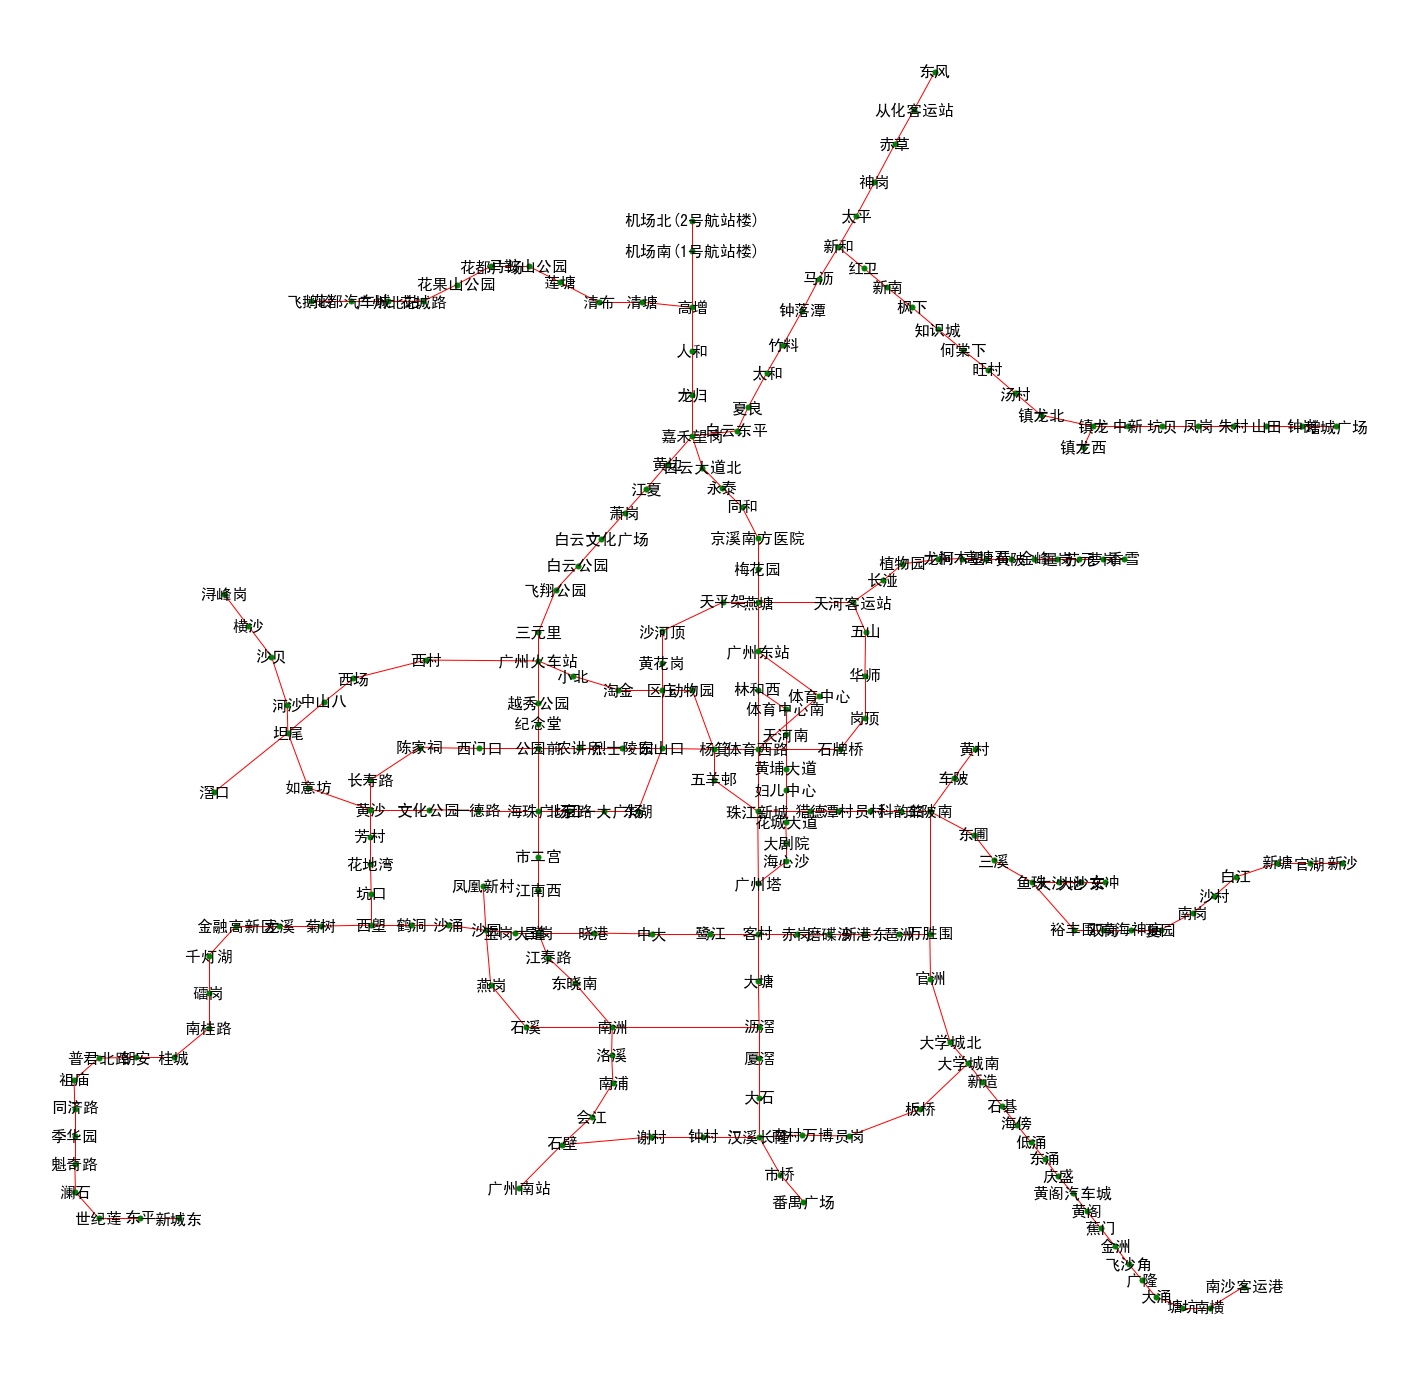

In [76]:
plt.figure(figsize=(25, 25))
nx.draw(path_conx,cords,ax = plt.gca().invert_yaxis(),node_color = 'g',edge_color = 'r',with_labels = True,font_size = 16,node_size =25)

In [63]:
shortest_path = search('Ë•øÂ°±','Ê±üÂ§è',path_graph,shortest_path_first)
print(shortest_path)

Total pathes: 15119
['Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô', 'ÈïøÂØøË∑Ø', 'ÈôàÂÆ∂Á•†', 'Ë•øÈó®Âè£', 'ÂÖ¨Âõ≠Ââç', 'Á∫™ÂøµÂ†Ç', 'Ë∂äÁßÄÂÖ¨Âõ≠', 'ÂπøÂ∑ûÁÅ´ËΩ¶Á´ô', '‰∏âÂÖÉÈáå', 'È£ûÁøîÂÖ¨Âõ≠', 'ÁôΩ‰∫ëÂÖ¨Âõ≠', 'ÁôΩ‰∫ëÊñáÂåñÂπøÂú∫', 'ËêßÂ≤ó', 'Ê±üÂ§è']


#### ÊúÄÁü≠Ë∑ùÁ¶ªÔºöË•øÂ°±‚ÜíÊ±üÂ§è

In [83]:
pretty_sign = emoji.emojize(':metro:‚Üí')
pretty_sign.join(shortest_path)

Ë∑ùÁ¶ªÊúÄÁü≠Ôºö


'Ë•øÂ°±üöá‚ÜíÂùëÂè£üöá‚ÜíËä±Âú∞Êπæüöá‚ÜíËä≥Êùëüöá‚ÜíÈªÑÊ≤ôüöá‚ÜíÈïøÂØøË∑Øüöá‚ÜíÈôàÂÆ∂Á•†üöá‚ÜíË•øÈó®Âè£üöá‚ÜíÂÖ¨Âõ≠Ââçüöá‚ÜíÁ∫™ÂøµÂ†Çüöá‚ÜíË∂äÁßÄÂÖ¨Âõ≠üöá‚ÜíÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüöá‚Üí‰∏âÂÖÉÈáåüöá‚ÜíÈ£ûÁøîÂÖ¨Âõ≠üöá‚ÜíÁôΩ‰∫ëÂÖ¨Âõ≠üöá‚ÜíÁôΩ‰∫ëÊñáÂåñÂπøÂú∫üöá‚ÜíËêßÂ≤óüöá‚ÜíÊ±üÂ§è'

#### ÊúÄÂ∞èÁ´ôÊï∞ÔºöË•øÂ°±‚ÜíÊ±üÂ§è

In [81]:
pretty_sign.join(search('Ë•øÂ°±','Ê±üÂ§è',path_graph,min_station_first))

Total pathes: 15119


'Ë•øÂ°±üöá‚ÜíÂùëÂè£üöá‚ÜíËä±Âú∞Êπæüöá‚ÜíËä≥Êùëüöá‚ÜíÈªÑÊ≤ôüöá‚ÜíÂ¶ÇÊÑèÂùäüöá‚ÜíÂù¶Â∞æüöá‚Üí‰∏≠Â±±ÂÖ´üöá‚ÜíË•øÂú∫üöá‚ÜíË•øÊùëüöá‚ÜíÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüöá‚Üí‰∏âÂÖÉÈáåüöá‚ÜíÈ£ûÁøîÂÖ¨Âõ≠üöá‚ÜíÁôΩ‰∫ëÂÖ¨Âõ≠üöá‚ÜíÁôΩ‰∫ëÊñáÂåñÂπøÂú∫üöá‚ÜíËêßÂ≤óüöá‚ÜíÊ±üÂ§è'

#### ÊúÄÂ∞èÊç¢‰πò: Ë•øÂ°±‚ÜíÊ±üÂ§è

In [112]:
pretty_sign.join(search('Ë•øÂ°±','Ê±üÂ§è',path_graph,min_transfer_first))

Total pathes: 15119


'<1Âè∑Á∫ø>Ë•øÂ°±üöá‚ÜíÂùëÂè£üöá‚ÜíËä±Âú∞Êπæüöá‚ÜíËä≥Êùëüöá‚ÜíÈªÑÊ≤ôüöá‚ÜíÈïøÂØøË∑Øüöá‚ÜíÈôàÂÆ∂Á•†üöá‚ÜíË•øÈó®Âè£üöá‚ÜíÂÖ¨Âõ≠Ââç<Êç¢‰πò2Âè∑Á∫ø>üöá‚ÜíÁ∫™ÂøµÂ†Çüöá‚ÜíË∂äÁßÄÂÖ¨Âõ≠üöá‚ÜíÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüöá‚Üí‰∏âÂÖÉÈáåüöá‚ÜíÈ£ûÁøîÂÖ¨Âõ≠üöá‚ÜíÁôΩ‰∫ëÂÖ¨Âõ≠üöá‚ÜíÁôΩ‰∫ëÊñáÂåñÂπøÂú∫üöá‚ÜíËêßÂ≤óüöá‚ÜíÊ±üÂ§è'

In [110]:
min_transfer_first([['Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô'],['Ë•øÂ°±', 'Èπ§Ê¥û', 'Ê≤ôÊ∂å', 'Ê≤ôÂõ≠', 'ÂÆùÂ≤óÂ§ßÈÅì','ÊòåÂ≤ó','Ê±üÂçóË•ø','Â∏Ç‰∫åÂÆ´','Êµ∑Áè†ÂπøÂú∫','‰∏ÄÂæ∑Ë∑Ø','ÊñáÂåñÂÖ¨Âõ≠','ÈªÑÊ≤ô']])

ÂΩìÂâçËÆ°ÁÆópathÔºö ['Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô']
Ë•øÂ°±‚ÜíÂùëÂè£ Á∫øË∑ØÔºö ['1Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'] ['1Âè∑Á∫ø'] ‰∫§ÈõÜÔºö 1Âè∑Á∫ø
ÂùëÂè£‚ÜíËä±Âú∞Êπæ Á∫øË∑ØÔºö ['1Âè∑Á∫ø'] ['1Âè∑Á∫ø'] ‰∫§ÈõÜÔºö 1Âè∑Á∫ø
Ëä±Âú∞Êπæ‚ÜíËä≥Êùë Á∫øË∑ØÔºö ['1Âè∑Á∫ø'] ['1Âè∑Á∫ø'] ‰∫§ÈõÜÔºö 1Âè∑Á∫ø
Ëä≥Êùë‚ÜíÈªÑÊ≤ô Á∫øË∑ØÔºö ['1Âè∑Á∫ø'] ['1Âè∑Á∫ø', '6Âè∑Á∫ø'] ‰∫§ÈõÜÔºö 1Âè∑Á∫ø
ÂΩìÂâçËÆ°ÁÆópathÔºö ['<1Âè∑Á∫ø>Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô']
ÂΩìÂâçpathË∑ØÁ∫øÈõÜÔºö {'1Âè∑Á∫ø'}
Êç¢‰πòÊ¨°Êï∞Ôºö 0
ÂΩìÂâçËÆ°ÁÆópathÔºö ['Ë•øÂ°±', 'Èπ§Ê¥û', 'Ê≤ôÊ∂å', 'Ê≤ôÂõ≠', 'ÂÆùÂ≤óÂ§ßÈÅì', 'ÊòåÂ≤ó', 'Ê±üÂçóË•ø', 'Â∏Ç‰∫åÂÆ´', 'Êµ∑Áè†ÂπøÂú∫', '‰∏ÄÂæ∑Ë∑Ø', 'ÊñáÂåñÂÖ¨Âõ≠', 'ÈªÑÊ≤ô']
Ë•øÂ°±‚ÜíÈπ§Ê¥û Á∫øË∑ØÔºö ['1Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'] ['Âπø‰ΩõÁ∫ø'] ‰∫§ÈõÜÔºö Âπø‰ΩõÁ∫ø
Èπ§Ê¥û‚ÜíÊ≤ôÊ∂å Á∫øË∑ØÔºö ['Âπø‰ΩõÁ∫ø'] ['Âπø‰ΩõÁ∫ø'] ‰∫§ÈõÜÔºö Âπø‰ΩõÁ∫ø
Ê≤ôÊ∂å‚ÜíÊ≤ôÂõ≠ Á∫øË∑ØÔºö ['Âπø‰ΩõÁ∫ø'] ['8Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'] ‰∫§ÈõÜÔºö Âπø‰ΩõÁ∫ø
Ê≤ôÂõ≠‚ÜíÂÆùÂ≤óÂ§ßÈÅì Á∫øË∑ØÔºö ['8Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'] ['8Âè∑Á∫ø'] ‰∫§ÈõÜÔ

['<1Âè∑Á∫ø>Ë•øÂ°±', 'ÂùëÂè£', 'Ëä±Âú∞Êπæ', 'Ëä≥Êùë', 'ÈªÑÊ≤ô']

In [113]:
import emoji

In [114]:
print(emoji.emojize('Python is :metro:'))

Python is üöá
